# Study Summary

### 1. 負二項分配(Negative Binomial Distribution)
### 2. 超幾何分配(Hypergeometric Distribution)

1. 負二項分配(Negative Binomial Distribution)
#### 參考詳細解說影片: https://www.youtube.com/watch?v=CsKBSqqGXyE

成功機率p，失敗機率q (p+q=1)，設x表示第k次成功的次數，則x為負二項機率分配

假設某城市家庭養狗機率是0.2，隨機訪問市民，當訪問到第10個家庭是第5個養狗家庭的機率為何?

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[0.064      0.1152     0.13824    0.13824    0.124416   0.10450944
 0.08360755 0.06449725 0.04837294 0.03547349 0.02554091 0.01811083
 0.01267758 0.00877679 0.00601837]
<class 'numpy.ndarray'>


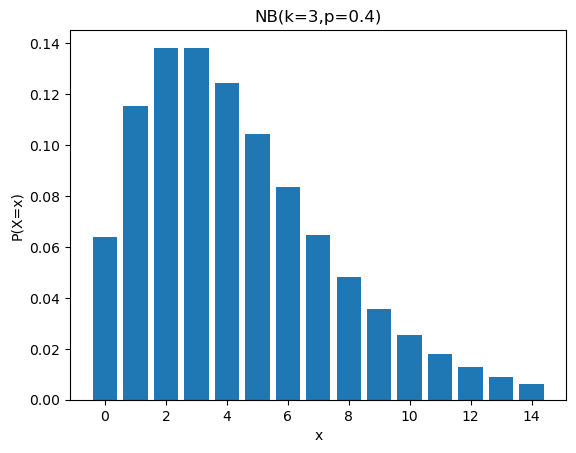

In [5]:
'''
# 前提：給定正數k，持續進行柏努力試驗，直到得到k次成功才停止，則總共試驗次數為x，x的分布為負二項分配
p: 成功的機率
k: 累積到 k 次成功後才停止
r: 產生出 樣本點空間
'''
# 1.定義負二項分配的基本資訊
p = 0.4 #成功的機率
k = 3   #指定成功次數

#產生一個同樣間隔的序列
#print(stats.nbinom.ppf(0.01, k, p)) #0.0
#print(stats.nbinom.ppf(0.99, k, p)) #15

#試驗次數分布
r = np.arange(stats.nbinom.ppf(0.01, k,p),
              stats.nbinom.ppf(0.99, k,p))
print(r)

# 2.計算機率質量函數 (probability mass function)
# P(X=x) --> 是機率
probs = stats.nbinom.pmf(r,k,p)
print(probs)
print(type(probs))

plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('NB(k=3,p=0.4)')
plt.show()

#結論: X越大(試驗次數越多)，Y成功機率越小

[0.064      0.1792     0.31744    0.45568    0.580096   0.68460544
 0.76821299 0.83271025 0.88108319 0.91655668 0.94209759 0.96020842
 0.972886   0.98166279 0.98768115]


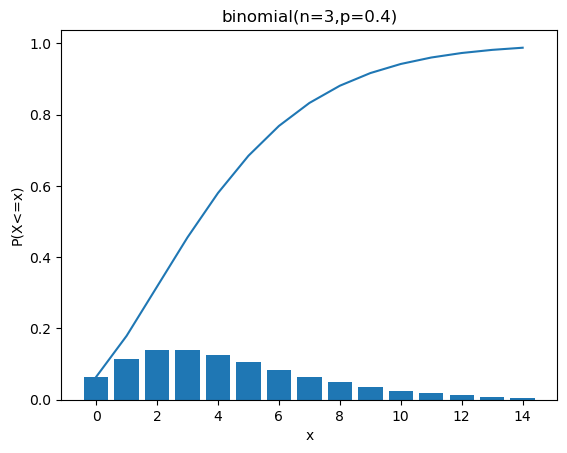

In [12]:
# 1.定義負二項分配的基本資訊
p = 0.4 #成功的機率
k = 3   #指定成功次數

# 2.計算負二項分布的累積機率 (cumulative density function)，pmf的累加
# P(X=x) --> 是機率
cumsum_probs = stats.nbinom.cdf(r,k,p)
print(cumsum_probs)

plt.bar(r, probs)
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('binomial(n=3,p=0.4)')
plt.plot(r, cumsum_probs)
plt.show()

#結論: 1. 累積機率越高時，曲線弧度越平，也就是試驗次數越多(x)，累積機率越高(Y)，
#      2. 負二項分布的機率質量和累積機率呈正相關

[ 1  2  6  5  2  5  3  5  3  6  6  1  4  5  0  4 10  5  4  4]


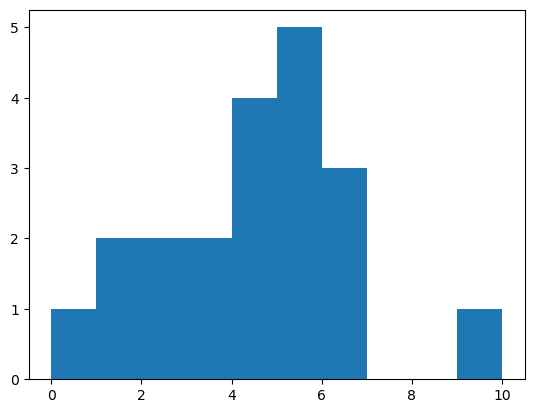

In [14]:
# 1.定義負二項分配的基本資訊
p = 0.4 #成功的機率
k = 3   #指定成功次數

# 2.計算負二項分布的隨機樣本點 (random sample)，cdf
# P(X=x) --> 是機率
x = stats.nbinom.rvs(k, p, size = 20)
print(x)

plt.hist(x)
plt.show()

#結論: 1. 累積機率越高時，斜率越小，也就是試驗次數越多(x)，累積機率越高(Y)，
#      2. 負二項分布的機率質量和累積機率呈正相關

In [15]:
#計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。
stat_nbin=stats.nbinom.stats(k,p,moments='mvks')
print(stat_nbin)
print(type(stat_nbin))
#E(X)
print("negative binomial mean=",float(stat_nbin[0]))
print("negative binomial variance=",float(stat_nbin[1]))
print("negative binomial kurtosis=",float(stat_nbin[2]))
print("negative binomial skew=",float(stat_nbin[3]))

(array(4.5), array(11.25), array(1.19256959), array(2.08888889))
<class 'tuple'>
negative binomial mean= 4.499999999999999
negative binomial variance= 11.249999999999996
negative binomial kurtosis= 1.1925695879998879
negative binomial skew= 2.088888888888889


2. 超幾何分配(Hypergeometric Distribution)

[ 0  1  2  3  4  5  6  7  8  9 10]
[1.79858837e-05 4.90524100e-04 5.33444958e-03 3.06388899e-02
 1.03406253e-01 2.15085007e-01 2.80058603e-01 2.25929629e-01
 1.08257947e-01 2.78558461e-02 2.92486384e-03]
<class 'numpy.ndarray'>


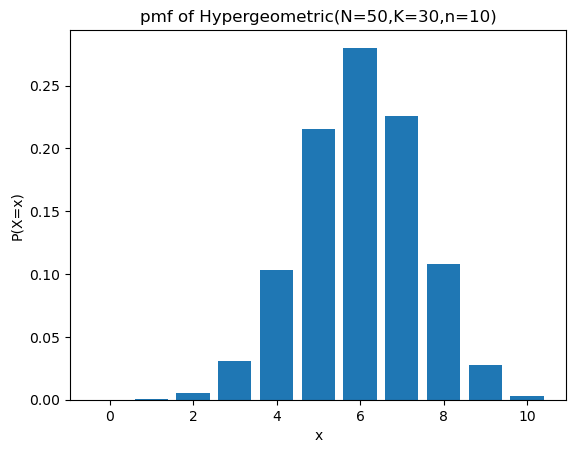

In [17]:
'''
超幾何分配(Hypergeometric Distribution)描述了
由有限個物件中抽出n個物件，成功抽出指定種類的物件的個數（不歸還 （without replacement）)
若隨機變量X 服從參數，則記為  H(n,K,N)，
𝑁 : 共有幾個物件, 𝑁 =0,1,…
𝐾 : 𝑁 個物件中，有 𝐾 個是你關心的物件類型個數, 𝐾 =0,1,2,…, 𝑁
𝑛 : K個物件，要抽出 𝑛 個物件, 𝑛 =0,1,…, 𝑁

現在有兩堆骰子，30個為紅色數字，20個為黑色數字，取出10個，X=有幾個是紅色的。
'''
# 1.定義超幾何分配的基本資訊
N=50
K=30
n=10

#產生一個同樣間隔的序列
r = np.arange(0, min(n+1,K+1)) #產出 x 對應點
print(r)

# 2.計算機率質量函數 (probability mass function)
# P(X=x) --> 是機率
probs = stats.hypergeom.pmf(r, N,K,n)
print(probs)
print(type(probs))

plt.bar(r, probs)
plt.ylabel('P(X=x)')
plt.xlabel('x')
plt.title('pmf of Hypergeometric(N=50,K=30,n=10)')
plt.show()

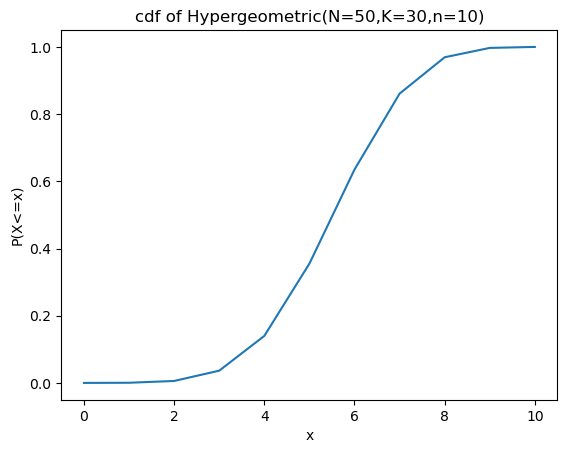

In [18]:
# 3.計算超幾何分配的累積機率 (cumulative density function)，pmf 的累加
# P(X=x) --> 是機率
cumsum_probs = stats.hypergeom.cdf(r, N,K,n)
plt.show()
plt.ylabel('P(X<=x)')
plt.xlabel('x')
plt.title('cdf of Hypergeometric(N=50,K=30,n=10)')
plt.plot(r, cumsum_probs)
plt.show()

In [19]:
# 4.透過 cdf ，給定一個 機率值，反推出對應到的 x
p_loc= stats.hypergeom.ppf(cumsum_probs, N,K,n)
print(p_loc)
#看上圖看結果

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


[6 6 6 7 4 6 4 4 7 4 4 7 6 5 4 6 8 3 5 5]


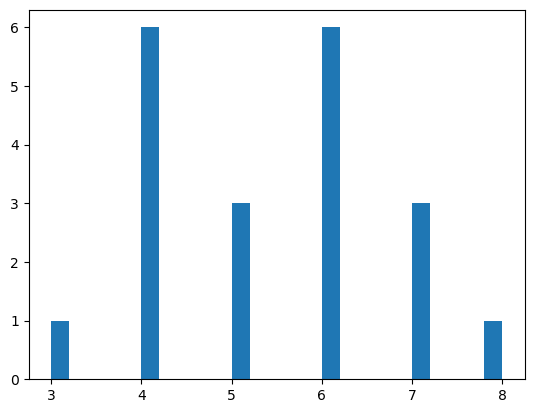

In [20]:
# 5.產生符合超幾何分配的隨機樣本點 (random sample)
X = stats.hypergeom.rvs(N,K,n,size=20)
print(X)
plt.hist(X,bins=25)
plt.show()

In [21]:
#6.計算固定參數下，隨機變數的平均數、變異數、偏度和峰度。

stat_hyperg=stats.hypergeom.stats(N,K,n,moments='mvks')
print(stat_hyperg)
print(type(stat_hyperg))
#E(X)
print("negative hypergeom mean=",float(stat_hyperg[0]))
print("negative hypergeom variance=",float(stat_hyperg[1]))
print("negative hypergeom kurtosis=",float(stat_hyperg[2]))
print("negative hypergeom skew=",float(stat_hyperg[3]))

(array(6.), array(1.95918367), array(-0.08930431), array(-0.13162123))
<class 'tuple'>
negative hypergeom mean= 6.0
negative hypergeom variance= 1.9591836734693877
negative hypergeom kurtosis= -0.08930431353897003
negative hypergeom skew= -0.13162123226950354


額外例子，某城市家庭養狗機率是0.2，隨機訪問10個家庭，有4個養狗家庭的機率為何?

In [22]:
# 用 python 計算
# 直接公式運算

# 用 python 計算
n=10   #訪問10個家庭
p=1/5  #養狗機率是0.2
prob1=math.factorial(10)/math.factorial(6)/math.factorial(4)*pow(p,4)*pow((1-p),6) #C 10取6
print(prob1)

# 直接公式運算
#P(X=4)
probs = stats.binom.pmf(4, n, p)
print(probs)
#兩者是相同的

0.08808038400000005
0.0880803839999999


# Homework

### Q1: 大樂透的頭獎，你必須從49個挑選出 6 個號碼，
###        且這六個號碼與頭獎的六個號碼一致，頭獎的機率是屬於哪一種分配?

ANS: 屬於超幾何分配。因為每次都屬於取出不放回的抽樣(without replacement)，且抽樣的6個號碼中皆須中獎號碼

In [ ]:
即: N=49 #母體數
    K=6  #在母體中成功的個數
    n=6  #樣本數
    x=6  #樣本數中，需要抽到成功的次數

### Q2: 運用範例的 python 程式碼，計算大樂透的中頭獎機率?

In [24]:
import numpy as np
from scipy import stats

In [26]:
N = 49
K = 6
n = 6
x = 6

prob = stats.hypergeom.pmf(x, N, K, n)
print(f'大樂透中獎機率:{prob.round(10)}')

大樂透中獎機率:7.15e-08


### Q3: 你覺得電腦簽注的中獎機率，和人腦簽注相比，哪一個機率高?

In [ ]:
ANS: 理論來說，機率相同。因為都是獨立且隨機抽樣